'<!DOCTYPE html>\n<html dir="ltr" lang="en-US">\n <head>\n  <script type="text/javascript">\n   window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"e6bbbab7f0","applicationID":"390783357","applicationTime":635.441355,"transactionName":"Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVddTUEAU0FRVRMbRFRcBgNPSl4aA1wOV3lV","queueTime":0,"ttGuid":"13bca9b329b1790","agentToken":null}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"e6bbbab7f0",applicationID:"390783357"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.no
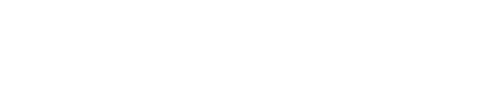
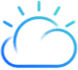

In [3]:
#!pip install bs4
import requests
import bs4 as bs
from bs4 import BeautifulSoup
import pandas as pd

response = requests.get("https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c")
#print(response)
soup = BeautifulSoup(response.content, 'html.parser')
soup.prettify()

In [32]:
#DAYS
days = []
for link in soup.find_all('h2', class_='DetailsSummary--daypartName--1Mebr'):  # iterate over every <a> tag
    days.append(link.get_text())
print(days)


#HIGH TEMPERATURES:
temp_f_high = [] 
for link in soup.find_all('span', class_="DetailsSummary--highTempValue--3x6cL"):  # iterate over every <a> tag
    temp_f_high.append(link.get_text())

#Get rid of degrees symbol for conversion later:
temp_f_high[:] = [s.replace('°', '') for s in temp_f_high]

#Temperature conversion F to C:
temp_c_high = []
for temp_f in temp_f_high:
    temp_c_high.append((int(temp_f)-32)*(5/9))
print(temp_c_high)


#LOW TEMPERATURES:
temp_f_low = [] 
for link in soup.find_all('span', class_="DetailsSummary--lowTempValue--1DlJK"):  # iterate over every <a> tag
    temp_f_low.append(link.get_text())

#Get rid of degrees symbol for conversion later:
temp_f_low[:] = [s.replace('°', '') for s in temp_f_low]

#Temperature conversion F to C:
temp_c_low = []
for temp_f in temp_f_low:
    temp_c_low.append((int(temp_f)-32)*(5/9))
print(temp_c_low)


#DESCRIPTION:
description =[]
for link in soup.find_all('p', class_="DailyContent--narrative--3AcXd"):
    description.append(link.get_text())
#print(description)
#print(len(description))

night_desc = []
day_desc = []
for i in range(0, len(description)):
    if i % 2:
        night_desc.append(description[i])
    else:
        day_desc.append(description[i])
print(day_desc)


['Today', 'Fri 11', 'Sat 12', 'Sun 13', 'Mon 14', 'Tue 15', 'Wed 16', 'Thu 17', 'Fri 18', 'Sat 19', 'Sun 20', 'Mon 21', 'Tue 22', 'Wed 23', 'Thu 24']
[13.88888888888889, 12.777777777777779, 13.88888888888889, 15.0, 14.444444444444445, 13.88888888888889, 14.444444444444445, 14.444444444444445, 14.444444444444445, 15.0, 15.555555555555557, 15.555555555555557, 15.0, 15.0, 15.0]
[6.666666666666667, 8.88888888888889, 10.0, 8.88888888888889, 6.666666666666667, 8.333333333333334, 7.777777777777779, 7.777777777777779, 7.777777777777779, 7.222222222222222, 7.222222222222222, 6.666666666666667, 5.555555555555555, 5.555555555555555, 6.111111111111112]
['Partly cloudy skies. High 57F. Winds W at 10 to 20 mph.', 'Partly cloudy skies during the morning hours will become overcast in the afternoon. High near 55F. Winds WNW at 5 to 10 mph.', 'Rain showers in the morning becoming more intermittent in the afternoon. High 57F. Winds SW at 10 to 15 mph. Chance of rain 50%.', 'Rain early...then remaining cl

In [34]:
import pandas as pd
import numpy as np

data = {'High temp': temp_c_high,
        'Low temp': temp_c_low,
        'Description': day_desc}
labels = days

df = pd.DataFrame(data, index= labels)
df

High temp   Low temp  \
Today   13.888889   6.666667   
Fri 11  12.777778   8.888889   
Sat 12  13.888889  10.000000   
Sun 13  15.000000   8.888889   
Mon 14  14.444444   6.666667   
Tue 15  13.888889   8.333333   
Wed 16  14.444444   7.777778   
Thu 17  14.444444   7.777778   
Fri 18  14.444444   7.777778   
Sat 19  15.000000   7.222222   
Sun 20  15.555556   7.222222   
Mon 21  15.555556   6.666667   
Tue 22  15.000000   5.555556   
Wed 23  15.000000   5.555556   
Thu 24  15.000000   6.111111   

                                              Description  
Today   Partly cloudy skies. High 57F. Winds W at 10 t...  
Fri 11  Partly cloudy skies during the morning hours w...  
Sat 12  Rain showers in the morning becoming more inte...  
Sun 13  Rain early...then remaining cloudy with shower...  
Mon 14  Partly cloudy. High 58F. Winds WNW at 5 to 10 ...  
Tue 15  Mostly cloudy skies early, then partly cloudy ...  
Wed 16  Cloudy with showers. High 58F. Winds SSW at 5 ...  
Thu 17  Partly cloudy skies. High 58F. Winds WNW at 5 ...  
Fri 18  Mostly cloudy skies with a few showers later i...  
Sat 19  Cloudy with showers. High 59F. Winds W at 5 to...  
Sun 20  Mostly cloudy skies early will become partly c...  
Mon 21  Sunshine and clouds mixed. High around 60F. Wi...  
Tue 22  Partly cloudy skies. High 59F. Winds NW at 5 t...  
Wed 23  Intervals of clouds and sunshine. High 59F. Wi...  
Thu 24  Intervals of clouds and sunshine. High 59F. Wi...